In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv("../DATA/iris.csv")

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Processing
### Features and Target

In [6]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
X= iris.drop('species',axis=1)
y= iris['species']

In [8]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelBinarizer

In [13]:
l_binarizer = LabelBinarizer()
y = l_binarizer.fit_transform(y)

In [14]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler()

In [19]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Model
### Creating the Model

In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
model = Sequential()

model.add(Dense(units=4,activation='relu',input_shape=[4,]))

model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',metrics=['accuracy'])

### Model Training

In [24]:
from keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(patience=10)

In [26]:
model.fit(scaled_X_train,y_train,epochs=300,
          validation_data=(scaled_X_test,y_test),verbose=1,
          callbacks=[early_stop])

Epoch 1/300
4/4 [==============================] - 1s 92ms/step - loss: 1.1089 - accuracy: 0.3167 - val_loss: 1.0996 - val_accuracy: 0.4000
Epoch 2/300
4/4 [==============================] - 0s 12ms/step - loss: 1.1059 - accuracy: 0.3167 - val_loss: 1.0982 - val_accuracy: 0.4000
Epoch 3/300
4/4 [==============================] - 0s 13ms/step - loss: 1.1032 - accuracy: 0.3167 - val_loss: 1.0968 - val_accuracy: 0.4000
Epoch 4/300
4/4 [==============================] - 0s 13ms/step - loss: 1.1007 - accuracy: 0.3167 - val_loss: 1.0957 - val_accuracy: 0.4000
Epoch 5/300
4/4 [==============================] - 0s 14ms/step - loss: 1.0983 - accuracy: 0.3167 - val_loss: 1.0947 - val_accuracy: 0.4000
Epoch 6/300
4/4 [==============================] - 0s 13ms/step - loss: 1.0958 - accuracy: 0.3250 - val_loss: 1.0936 - val_accuracy: 0.4000
Epoch 7/300
4/4 [==============================] - 0s 14ms/step - loss: 1.0936 - accuracy: 0.3333 - val_loss: 1.0927 - val_accuracy: 0.4000
Epoch 8/300
4/4 [===

## Model Evaluation

In [27]:
metrics = pd.DataFrame(model.history.history)

In [28]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.108876,0.316667,1.099601,0.400000
1,1.105906,0.316667,1.098215,0.400000
2,1.103159,0.316667,1.096812,0.400000
3,1.100745,0.316667,1.095713,0.400000
4,1.098330,0.316667,1.094677,0.400000
...,...,...,...,...
295,0.394945,0.925000,0.441150,0.933333
296,0.393871,0.925000,0.440025,0.933333
297,0.392948,0.925000,0.438844,0.933333
298,0.391886,0.925000,0.437694,0.933333


<Axes: >

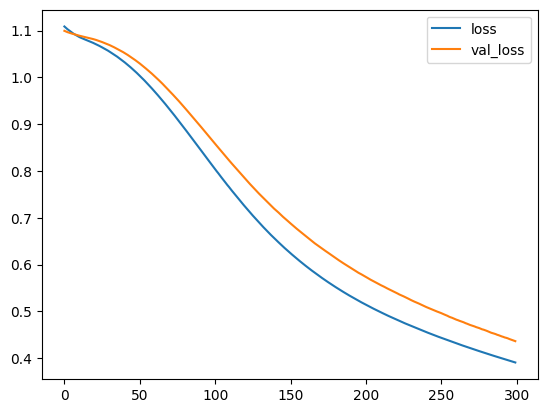

In [29]:
metrics[['loss','val_loss']].plot()

<Axes: >

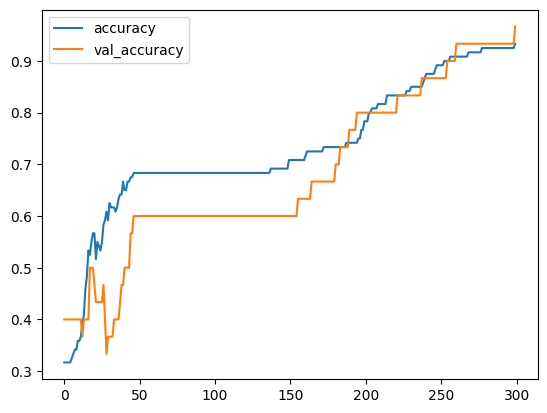

In [30]:
metrics[['accuracy','val_accuracy']].plot()

In [31]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.43651580810546875, 0.9666666388511658]

## Ready Model for Deployment

In [32]:
epochs = len(metrics)

In [33]:
scaled_X = scaler.fit_transform(X)

In [36]:
model = Sequential()

model.add(Dense(units=4,activation='relu',input_shape=[4,]))

model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/300
5/5 [==============================] - 0s 5ms/step - loss: 1.1495 - accuracy: 0.3333
Epoch 2/300
5/5 [==============================] - 0s 5ms/step - loss: 1.1431 - accuracy: 0.3333
Epoch 3/300
5/5 [==============================] - 0s 4ms/step - loss: 1.1381 - accuracy: 0.3333
Epoch 4/300
5/5 [==============================] - 0s 9ms/step - loss: 1.1327 - accuracy: 0.3400
Epoch 5/300
5/5 [==============================] - 0s 5ms/step - loss: 1.1278 - accuracy: 0.3400
Epoch 6/300
5/5 [==============================] - 0s 5ms/step - loss: 1.1228 - accuracy: 0.3400
Epoch 7/300
5/5 [==============================] - 0s 5ms/step - loss: 1.1179 - accuracy: 0.3400
Epoch 8/300
5/5 [==============================] - 0s 5ms/step - loss: 1.1136 - accuracy: 0.3400
Epoch 9/300
5/5 [==============================] - 0s 6ms/step - loss: 1.1091 - accuracy: 0.3400
Epoch 10/300
5/5 [==============================] - 0s 5ms/step - loss: 1.1048 - accuracy: 0.3733
Epoch 11/300
5/5 [===========

In [39]:
model.save('final_iris_model.h5')

### Saving Scaler

In [40]:
import joblib

In [41]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

### Predicting a Single New Flower

In [42]:
from keras.models import load_model

In [43]:
flower_model = load_model('final_iris_model.h5')
flower_scaler = joblib.load('iris_scaler.pkl')

In [44]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [45]:
flower_example = {'sepal_length':5.1,
                  'sepal_width':3.5,
                  'petal_length':1.4,
                  'petal_width':0.2}

In [46]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [47]:
l_binarizer.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [66]:
def return_prediction(model, scaler, sample_json):

    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']

    flower = [[s_len,s_wid,p_len,p_wid]]

    flower = scaler.transform(flower)

    classes = np.array(['setosa', 'versicolor', 'virginica'])

    preds_prob = model.predict(flower) 
    class_ind = np.argmax(preds_prob, axis=1)[0]
    return classes[class_ind]

In [67]:
return_prediction(flower_model,flower_scaler,flower_example)

1/1 [==============================] - 0s 23ms/step


c:\Users\Emirhan\anaconda3\envs\tfenv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


'setosa'

##  Real Code for Deployment

In [68]:
from keras.models import load_model
import joblib

flower_model = load_model('final_iris_model.h5')
flower_scaler = joblib.load('iris_scaler.pkl')

def return_prediction(model, scaler, sample_json):

    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']

    flower = [[s_len,s_wid,p_len,p_wid]]

    flower = scaler.transform(flower)

    classes = np.array(['setosa', 'versicolor', 'virginica'])

    preds_prob = model.predict(flower) 
    class_ind = np.argmax(preds_prob, axis=1)[0]
    return classes[class_ind]